In [1]:
import os

In [5]:
data_dir = "C:\\Users\\praso\\Downloads\\original\\tensorflow-keras-bootcamp\\Malarial-Infection-CNN-classifier-Keras\\cell_images"

In [6]:
os.listdir(data_dir)

['test', 'train']

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
from matplotlib.image import imread

In [12]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [13]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [14]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [19]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [22]:
example_para_cell = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'
imread(example_para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

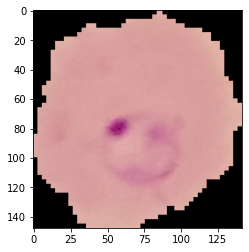

In [25]:
plt.imshow(imread(example_para_cell));

In [26]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [27]:
example_uninfected_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'
imread(example_uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

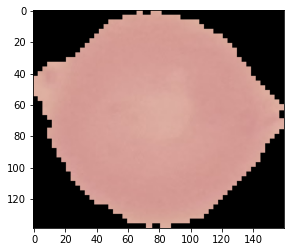

In [28]:
plt.imshow(imread(example_uninfected_cell));

In [46]:
dim1 = []
dim2 = []
for filename in os.listdir(test_path + 'parasitized'):
    d1,d2,ch = imread(test_path + 'parasitized\\' + filename).shape
    dim1.append(d1)
    dim2.append(d2)

In [47]:
np.mean(dim1)

134.64307692307693

In [48]:
np.mean(dim2)

133.31846153846155

C:\Users\praso\miniconda3\envs\mytfenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


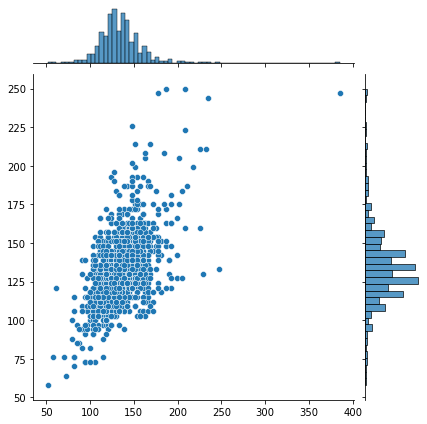

In [53]:
sns.jointplot(dim1,dim2)

Let's reshape all our images to (130,130,3)

In [62]:
image_shape = (130,130,3)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

In [59]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [64]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [68]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2],color_mode='rgb', batch_size=16, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [69]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2],color_mode='rgb', batch_size=16, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [70]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [71]:
# model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stopping])

In [72]:
from tensorflow.keras.models import load_model

In [74]:
model = load_model('malaria_detector.h5')

In [76]:
model.evaluate(test_image_gen)

  ...
    to  
  ['...']
163/163 [==============================] - 19s 119ms/step - loss: 36.2957 - accuracy: 0.8738


[36.295700134309534, 0.8738462]

In [80]:
pred = model.predict(test_image_gen)

In [81]:
predictions = pred > 0.5

In [82]:
len(predictions)

2600

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [85]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1272,   28],
       [ 299, 1001]], dtype=int64)

In [86]:
para_cell

'C:\\Users\\praso\\Downloads\\original\\tensorflow-keras-bootcamp\\Malarial-Infection-CNN-classifier-Keras\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [87]:
from tensorflow.keras.preprocessing import image

In [90]:
my_image = image.load_img(para_cell, target_size=image_shape)

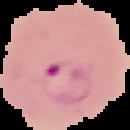

In [91]:
my_image

In [92]:
my_image_arr = image.img_to_array(my_image)

In [93]:
my_image_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [94]:
my_image_arr.shape

(130, 130, 3)

In [95]:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [96]:
my_image_arr.shape

(1, 130, 130, 3)

In [97]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)